# Correlation time from block averaging #

The correlation time can be estimated by using block averaging. To start, we compute block averages for $n$ "blocks" of a trajectory with a block size of $t_b$ (so the simulation length is $t=nt_b$):

$$ \overline{A} = \frac{1}{t_b}\int_0^{t_b}A(t)dt $$

The variance of the block averages can then be computed:

$$ \sigma_A^2(\overline{A}_B) = \frac{1}{n}\sum_{k=1}^{n}(\overline{A}_k-\langle A \rangle)^2 $$

Assuming $t_B >> \tau_A$ where $T_A$ is the correlation time, we can define the function:

$$ T(t_B) = \frac{t_B}{2} \frac{\sigma_A^2(\overline{A}_B)}{\langle A^2 \rangle - \langle A \rangle^2} $$

We can increase $t_b$ and when it is large enough we find that $T(t_b >> \tau_A) \rightarrow \tau_A$.


In [1]:
import numpy as np
from tqdm.notebook import tqdm

def T_metric(A, Tb, ts):
    '''
    Compute T metric for a given block size

    Parameters
    ----------
    A : numpy.ndarray
        The timeseries of data
    Tb : int
        The block size
    ts : float
        The timestep in ps
    
    Returns
    -------
    T : float
        The T value for a given block size
    '''
    n_blocks = A.size // Tb # Floor division to get the number of blocks
    cropped_len = n_blocks * Tb # How many datapoints to include for even sized blocks
    A_reshaped = A[:cropped_len].reshape(n_blocks, Tb) # reshape array so each row is a block
    blockAvs = np.mean(A_reshaped, axis=1) # Take mean of each block
    
    A_mean = np.mean(A) # overall mean
    variance = np.mean((blockAvs-A_mean)**2) # variance for this blocksize
    T = Tb/2 * variance/(np.mean(A**2)-A_mean**2) * ts # calculate T
    
    return T

  0%|          | 0/5 [00:00<?, ?it/s]

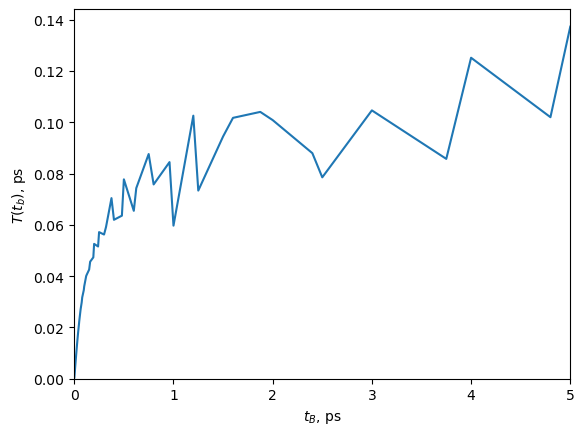

In [2]:
KE = np.loadtxt("kinetic_energies.ene")

Tvals = []
for i in tqdm(range(1,6)):
    Tv = []
    Tb_ps = []
    for Tb in range(1, 5001):
        if KE.size % Tb == 0:
            Tv.append(T_metric(KE[:,5], Tb, 0.001))
            Tb_ps.append(Tb*0.001)
    Tvals.append(Tv)

Tvals = np.mean(np.column_stack(Tvals), axis=1)

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(Tb_ps, Tvals)
ax.set_xlabel(r"$t_B$, ps")
ax.set_ylabel(r"$T(t_b)$, ps")
ax.set_xlim(0, np.max(Tb_ps))
ax.set_ylim(0)
plt.show()

# Standard Deviation of the Mean #

The standard deviation of the mean for $m$ trajectories of length $n$ is calculated as:

$$ \sigma_m^2 \cong \frac{1}{mn^2} \sum_{\alpha=1}^m\sum_{i=1}^n \delta x_{\alpha i}^2 $$

where $\delta x_{\alpha i}$ is the value of the observation relative to the overall mean:

$$ \delta x_{\alpha i} = x_{\alpha i} - \frac{1}{mn} \sum_{\alpha=1}^m\sum_{i=1}^n x_{\alpha i}. $$

In [3]:
def stdev_of_mean(A):
    '''
    Calculate the standard deviation of the mean

    Parameters
    ----------
    A : numpy.ndarray(shape=(n_frames, n_trials))
        The timeseries'
    
    Returns
    -------
    s : float
        The standard deviation of the mean
    '''
    mean = np.mean(A)
    relA2 = (A - mean)**2
    s = np.mean(relA2)/A.shape[0]
    return s


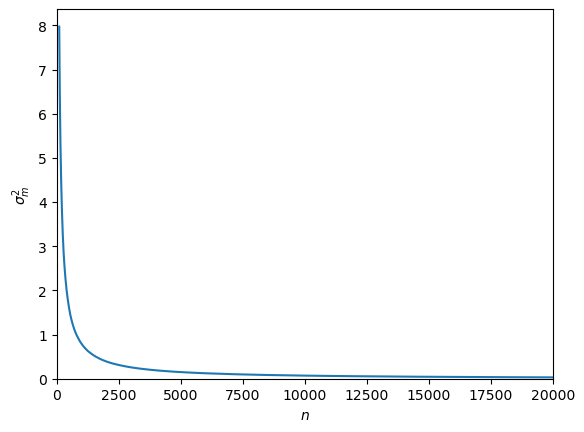

In [4]:
svals = []
nframes_list = list(range(100, KE.shape[0]))
for nframes in nframes_list:
    svals.append(stdev_of_mean(KE[:nframes,:]))

fig, ax = plt.subplots()
ax.plot(nframes_list, svals)
ax.set_ylabel(r"$\sigma_m^2$")
ax.set_xlabel(r"$n$")
ax.set_xlim(0, 20000)
ax.set_ylim(0)
plt.show()